In [1]:
# Objectives 
# 1 what is the most drequest genre of movies released on netflix?
# 2 what genres has the highest votes in vote_avg column(Which genre has the highest vote)?
# 3 what movie got the highest popularity? what's its genre?
# 4 what movie got the lowest popularity? what's its genre?
# 5 which year has the most filmmed movies?

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [8]:
 # • Exploration Summary
 # • we have a dataframe consisting of 9827 rows and 9 columns.
 # • our dataset looks a bit tidy with no NaNs nor duplicated values.
 # • Release_Date column needs to be casted into date time and to extract only the Overview, Original_Languege and Poster-Url wouldn't be so useful during analys.
 # • there is noticable outliers in Popularity column.
 # • Vote_Average bettter be categorised for proper analysis.
 # • Genre column has comma saperated values and white spaces that needs to be hand

# Handling Date

In [9]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

df['Release_Date'].dtypes

dtype('<M8[ns]')

In [10]:
df['Release_Date'] = df['Release_Date'].dt.year #data type of Release_Date chaged to int and date and months are removed

In [11]:
df['Release_Date'].dtypes


dtype('int32')

In [12]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# we dont need Overview, Poster_URL and Original_Language column so we will remove it

In [13]:
cols = ['Overview', 'Poster_Url', 'Original_Language']

In [14]:
df.drop(cols, axis=1, inplace=True)

In [15]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [16]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# dealing with Votes_Count

In [17]:
df['Vote_Average'].describe()

count    9827.000000
mean        6.439534
std         1.129759
min         0.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: Vote_Average, dtype: float64

In [18]:
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df
    

In [19]:
labels = ['not_popular' , 'below_avg', 'average', 'pupular']

In [20]:
categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['pupular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'pupular']

In [21]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,pupular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,pupular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,pupular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [22]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
pupular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# handling genre

In [25]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,pupular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,pupular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,pupular,Science Fiction
3,2022,The Batman,3827.658,1151,pupular,Crime
4,2022,The Batman,3827.658,1151,pupular,Mystery


In [26]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [28]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [29]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,pupular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,pupular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,pupular,Science Fiction
3,2022,The Batman,3827.658,1151,pupular,Crime
4,2022,The Batman,3827.658,1151,pupular,Mystery


# now we can find our solutions

Q1: What is the most frequent genre in the dataset?

In [30]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

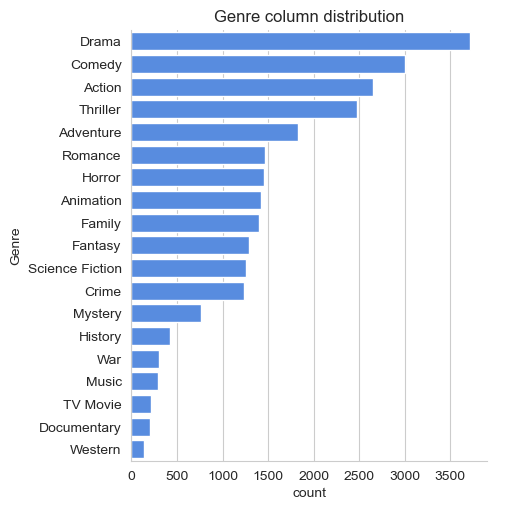

In [31]:
sns.set_style('whitegrid')
sns.catplot(y='Genre' , data = df, kind = 'count',
            order = df['Genre'].value_counts().index, color='#4287f5')
plt.title('Genre column distribution')
plt.show()

Q2: What genres has highest votes ?

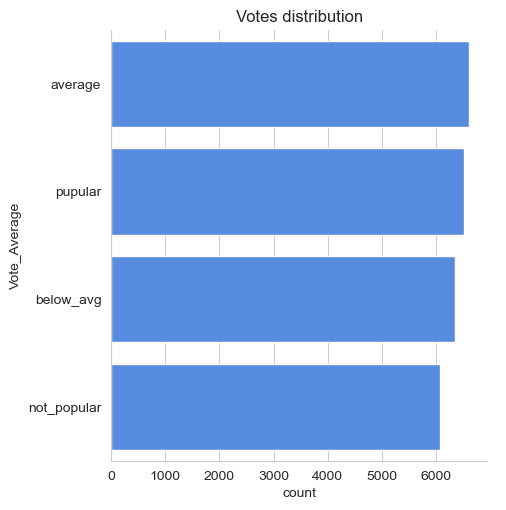

In [32]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', 
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')
plt.title('Votes distribution')
plt.show()

Q3: What movie got the highest popularity ? what's its genre ?
  

In [33]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,pupular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,pupular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,pupular,Science Fiction


Q4: What movie got the lowest popularity? what's its genre?

In [34]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,pupular,War
25550,1984,Threads,13.354,186,pupular,Drama
25551,1984,Threads,13.354,186,pupular,Science Fiction


 Q5: Which year has the most filmmed movies?

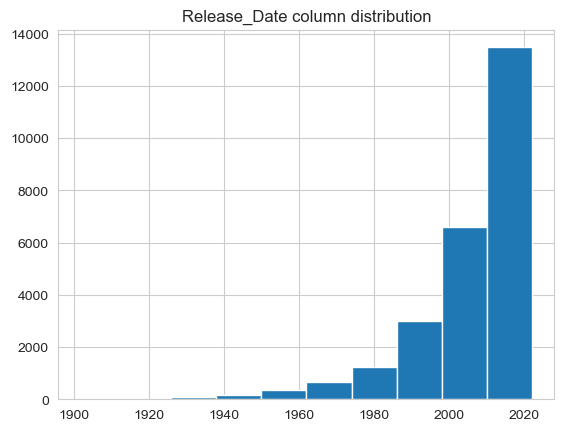

In [35]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()


# Conclusion

# Q1: What is the most frequent genre in the dataset?
 Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.
# Q2: What genres has highest votes ?
 we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.
# Q3: What movie got the highest popularity ? what's its genre ?
 Action, Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Adventure and Sience Fiction.
# Q3: What movie got the lowest popularity ? what's its genre ?
 The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history`.
# Q4: Which year has the most filmmed movies?
 year 2020 has the highest filmming rate in our dataset